[Iris] Best k = 3, Accuracy = 0.974


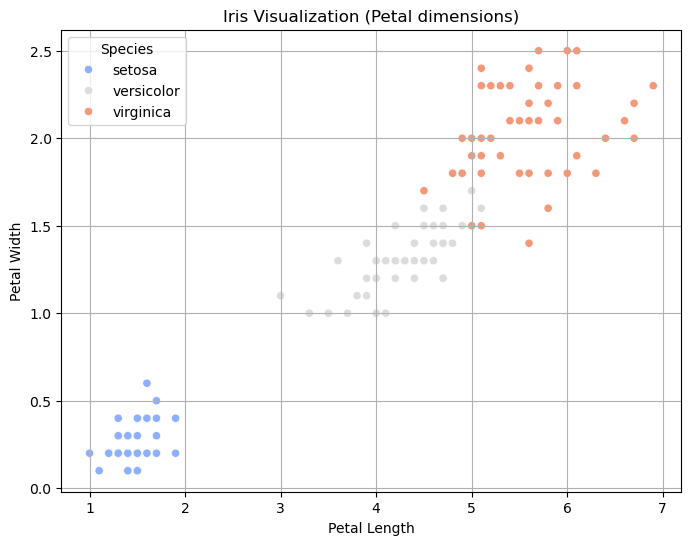

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Завантаження даних
data = load_iris()
X, y = data['data'], data['target']
feature_names = data['feature_names']
target_names = data['target_names']

# Таблиця
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y
df['species'] = df['class'].apply(lambda i: target_names[i])

# Розділення
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Пошук найкращого k
scores_dict = {}
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    scores_dict[k] = acc

# Найкращий k
best_k = max(scores_dict, key=scores_dict.get)
best_score = scores_dict[best_k]
print(f"[Iris] Best k = {best_k}, Accuracy = {round(best_score, 3)}")

# Візуалізація двох ознак
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='petal length (cm)', y='petal width (cm)',
    hue='species',
    palette='coolwarm'
)
plt.title('Iris Visualization (Petal dimensions)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species')
plt.grid(True)
plt.show()


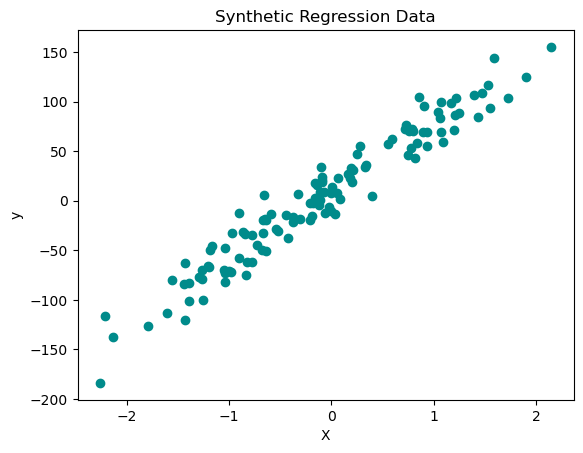

[Synthetic] Best k = 5, R² = 0.9254


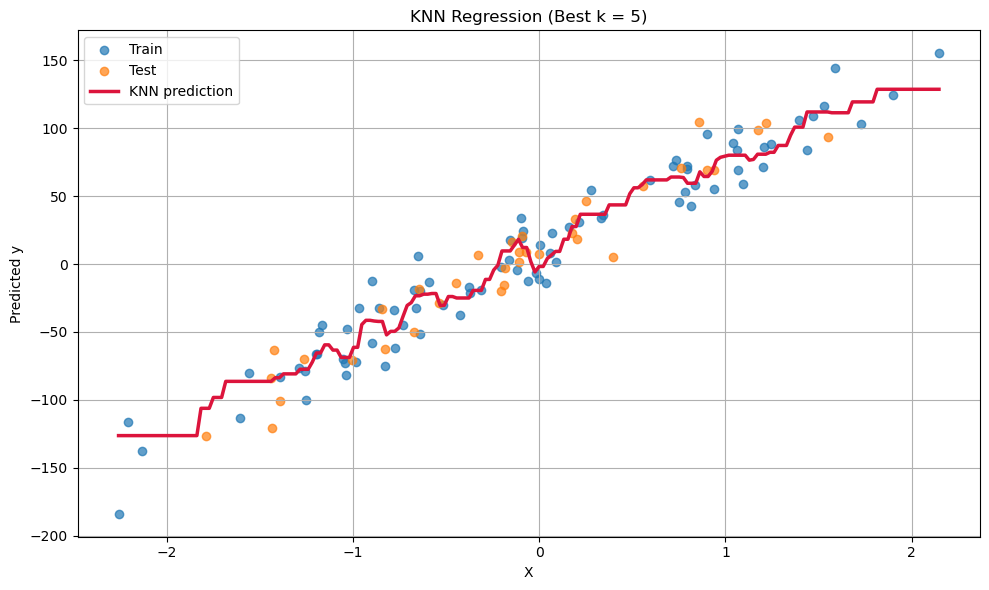

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Створення даних
X, y = make_regression(
    n_samples=120,
    n_features=1,
    noise=18,
    bias=10,
    random_state=2025
)

# Візуалізація
plt.figure()
plt.scatter(X, y, c='darkcyan')
plt.title("Synthetic Regression Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Розділення і нормалізація
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Вибір найкращого K
results = []
for k in range(1, 30):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_norm, y_train)
    score = reg.score(X_test_norm, y_test)
    results.append((k, score))

# Кращий результат
best_k, best_score = max(results, key=lambda t: t[1])
print(f"[Synthetic] Best k = {best_k}, R² = {round(best_score, 4)}")

# Побудова кривої
model_best = KNeighborsRegressor(n_neighbors=best_k)
model_best.fit(X_train_norm, y_train)

x_vals = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
x_vals_scaled = scaler.transform(x_vals)
y_preds = model_best.predict(x_vals_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Train', alpha=0.7)
plt.scatter(X_test, y_test, label='Test', alpha=0.7)
plt.plot(x_vals, y_preds, color='crimson', linewidth=2.5, label='KNN prediction')

plt.title(f"KNN Regression (Best k = {best_k})")
plt.xlabel("X")
plt.ylabel("Predicted y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
